Copyright 2022 @ Hrishikesh_Dubey

# Image Compression using PCA

## Problem Statement
Principal Component Analysis is a linear dimentionality reduction algorithm that transform a set of correlated variables(p) into a smaller(k) number of uncorrelated variables called principal components while keeping as much of the variability in the original data as possible.

## Objective
The objective of this project is to achieve maximum compression of an image with minimum loss in quality.

## Data Cleaning

### Loading and Displaying Dataset

In [ ]:
import pandas as pd
mnist = pd.read_csv('mnist.csv')
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist.shape

(60000, 785)

### Dropping unwanted columns

In [ ]:
mnist.drop(columns='label', inplace=True)
mnist.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist.shape

(60000, 784)

## Data Visualization

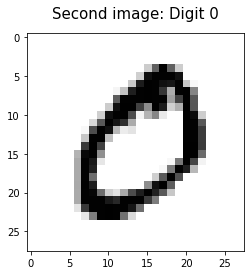

In [ ]:
import matplotlib.pyplot as plt

second_image = mnist.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
plt.savefig("Second image.png")

## Implementing Principal Component Analysis (PCA)

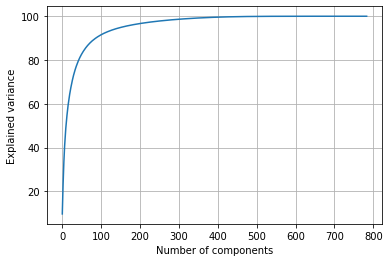

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

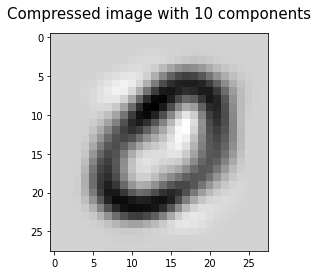

In [ ]:
pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)
plt.savefig("image_pca_10.png")

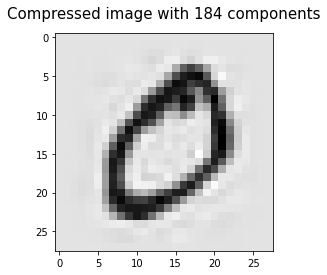

In [ ]:
pca_184 = PCA(n_components=184)
mnist_pca_184_reduced = pca_184.fit_transform(mnist)
mnist_pca_184_recovered = pca_184.inverse_transform(mnist_pca_184_reduced)

image_pca_184 = mnist_pca_184_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_184, cmap='gray_r')
plt.title('Compressed image with 184 components', fontsize=15, pad=15)
plt.savefig("image_pca_184.png")

### 96% of the pixels match with uncompressed image

In [ ]:
np.cumsum(pca_184.explained_variance_ratio_ * 100)[-1]

96.11874421802709